### Simulation and Wiener filtering TP3 Jingzhuo Hui  & You Zuo

In [1]:
from nt_toolbox.general import *
from nt_toolbox.signal import *
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import matplotlib.mlab as mlab
from scipy.io import wavfile
from matplotlib.pyplot import specgram
from scipy import signal

## EXO1

### Estimate the spectrum density by periodogram and Welsh method

In [3]:
sample_rate1, data1 = wavfile.read("noise1.wav")
sample_rate2, data2 = wavfile.read("noise2.wav")
sample_rate3, data3 = wavfile.read("noise3.wav")

In [4]:
def spectrum_density(data, sample_rate, title):
    
    # Periodogram analyse
    f, Pxx = signal.periodogram(data, sample_rate)
    fig, ax = plt.subplots(1, sharex=True, figsize=(10,5))
    plt.subplots_adjust(wspace =0.5, hspace =0)
    ax = plt.subplot(1,2,1)
    ax.semilogy(f, Pxx)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    ax.title.set_text('%s, Periodogram'%title)
    
    # Welsh analyse
    f, Pxx = signal.welch(data, sample_rate, nperseg=1024)
    ax = plt.subplot(1,2,2)
    ax.semilogy(f, Pxx)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    ax.title.set_text('%s, Welsh'%title)
    plt.show()
    

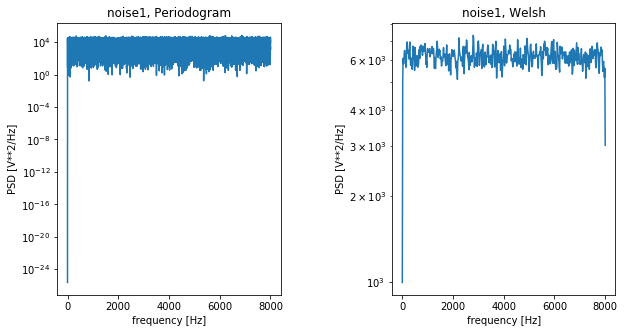

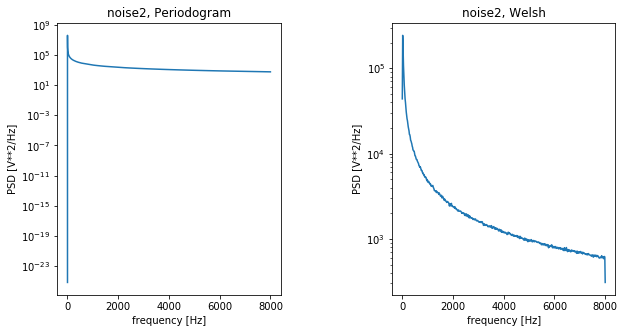

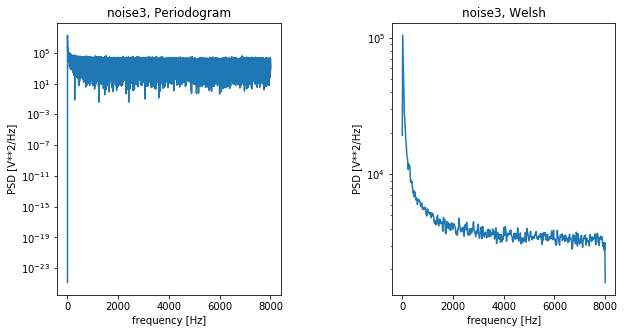

In [5]:
spectrum_density(data1, sample_rate1,'noise1')
spectrum_density(data2, sample_rate2,'noise2')
spectrum_density(data3, sample_rate3,'noise3')

### Identify the color of the noise (white, pink, red…)

* For the first, we can see that in a wide frequency range, the noise energy of each bandwidth band is equal

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


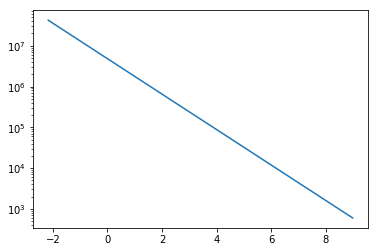

In [6]:
f, Pxx = signal.periodogram(data2, sample_rate2)
ax = plt.subplot(1,1,1)
ax.semilogy(np.log(f), Pxx)
plt.show()

* For the sencond noise, we can find that the power decreases as frequency increases, and if we change the frequency into log(Frequency), the PSD is linear.

* For the third noise, it's a combination of a white noise and a pink noise

## EXO2

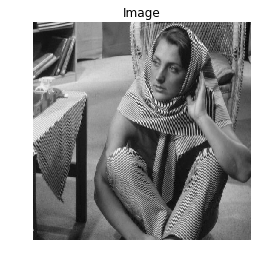

In [7]:
name = 'barbara.jpg'
M = load_image(name)
imageplot(M, 'Image')

### Simulate a noisy version of the image with various SNR (0dB, 5 dB, 10 dB, 15 dB, 20 dB), using a Gaussian white noise


In [8]:
def wgn(src, snr):
    shape = src.shape
    snr = 10**(snr/10.0)
    xpower = np.sum(src**2)/(shape[0]*shape[1])
    npower = xpower / snr
    return np.random.randn(shape[0],shape[1]) * np.sqrt(npower)

In [9]:
def gaussian_noise(src, snr):
    noise_img = np.copy(src)
    noise = wgn(noise_img, snr)
    noise_img = noise_img + noise
    return noise_img


In [10]:
snr = [0, 5, 10, 15, 20]
title = ['snr = 0', 'snr = 5', 'snr = 10', 'snr = 15', 'snr = 20']

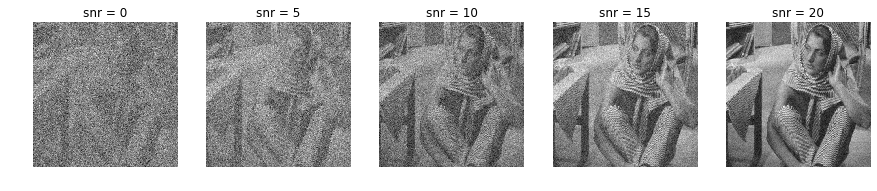

In [11]:
fig, axs = plt.subplots(nrows = 1, ncols = len(snr), figsize = (15, 15))
for ind, s in enumerate(snr):
    res = gaussian_noise(M, s)
    ax = axs[ind]
    ax.title.set_text(title[ind])
    ax.imshow(res, cmap='gray')
    ax.axis('off')
plt.show()

In [12]:
# Just for verification of the SNR
# np.log10(np.sum(M**2)/np.sum((res-M)**2))*10

## Denoise the image using the Wiener filter


In [13]:
from scipy.signal import wiener

/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


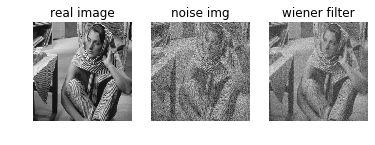

In [14]:
noise_img = gaussian_noise(M, 10)
res = wiener(noise_img)
imageplot(M, 'real image',(1,3,1))
imageplot(noise_img, 'noise img',(1,3,2))
imageplot(res, 'wiener filter',(1,3,3))

* We can find the wiener can filter the image, but it doesn't work well